# Explore here

It's recommended to use this notebook for exploration purposes.

In [55]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(resource_url, time.sleep(10))

# If the request has been executed correctly (code 200), then the HTML content of the page has been downloaded
if response:
    # We transform the flat HTML into real HTML (structured and nested, tree-like)
    soup = BeautifulSoup(response.text, 'html')
    soup

In [4]:
# soup

In [7]:
years = soup.find_all("span", class_="year")
years

[<span class="year">2024</span>,
 <span class="year">2023</span>,
 <span class="year">2022</span>,
 <span class="year">2021</span>,
 <span class="year">2020</span>,
 <span class="year">2019</span>,
 <span class="year">2018</span>,
 <span class="year">2017</span>,
 <span class="year">2016</span>,
 <span class="year">2015</span>,
 <span class="year">2014</span>,
 <span class="year">2013</span>,
 <span class="year">2012</span>,
 <span class="year">2011</span>,
 <span class="year">2010</span>,
 <span class="year">2009</span>]

In [53]:
for i in range(len(years)):
    years[i] = years[i].text
years

['2024',
 '2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009']

In [54]:
for i in range(len(years)):
    years[i] = int(years[i])
years

[2024,
 2023,
 2022,
 2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009]

In [46]:
import re

# Get all elements of type 'span' from HTML document
tds = soup.find_all("td")
prices = []

# We iterate through each of the results to find the element that contains the given amount. Since the amount we are looking for is the first of all, we search for it (for example, with a regular expression) and when we find it, we print its value
for td in tds:
    prices.append(re.search(r'\$\w+\.\d*', td.text))

prices


[None,
 <re.Match object; span=(0, 6), match='$97.15'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$96.77'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$81.46'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$53.82'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$31.53'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$24.57'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$21.46'>,
 None,
 None,
 <re.Match object; span=(0, 6), match='$11.75'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$7.00'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$4.04'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$3.19'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$2.01'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$0.41'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$0.20'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$0.11'>,
 None,
 None,
 <re.Match object; span=(0, 5), match='$0.11'>,
 None,


In [47]:

prices = [x for x in prices if x is not None] 
prices = prices[0:16]
prices

[<re.Match object; span=(0, 6), match='$97.15'>,
 <re.Match object; span=(0, 6), match='$96.77'>,
 <re.Match object; span=(0, 6), match='$81.46'>,
 <re.Match object; span=(0, 6), match='$53.82'>,
 <re.Match object; span=(0, 6), match='$31.53'>,
 <re.Match object; span=(0, 6), match='$24.57'>,
 <re.Match object; span=(0, 6), match='$21.46'>,
 <re.Match object; span=(0, 6), match='$11.75'>,
 <re.Match object; span=(0, 5), match='$7.00'>,
 <re.Match object; span=(0, 5), match='$4.04'>,
 <re.Match object; span=(0, 5), match='$3.19'>,
 <re.Match object; span=(0, 5), match='$2.01'>,
 <re.Match object; span=(0, 5), match='$0.41'>,
 <re.Match object; span=(0, 5), match='$0.20'>,
 <re.Match object; span=(0, 5), match='$0.11'>,
 <re.Match object; span=(0, 5), match='$0.11'>]

In [48]:
for i in range(len(prices)):
    prices[i] = prices[i].group(0)
prices

['$97.15',
 '$96.77',
 '$81.46',
 '$53.82',
 '$31.53',
 '$24.57',
 '$21.46',
 '$11.75',
 '$7.00',
 '$4.04',
 '$3.19',
 '$2.01',
 '$0.41',
 '$0.20',
 '$0.11',
 '$0.11']

In [49]:
for i in range(len(prices)):
    prices[i] = prices[i][1:]
prices

['97.15',
 '96.77',
 '81.46',
 '53.82',
 '31.53',
 '24.57',
 '21.46',
 '11.75',
 '7.00',
 '4.04',
 '3.19',
 '2.01',
 '0.41',
 '0.20',
 '0.11',
 '0.11']

In [51]:
for i in range(len(prices)):
    prices[i] = float(prices[i])
prices

[97.15,
 96.77,
 81.46,
 53.82,
 31.53,
 24.57,
 21.46,
 11.75,
 7.0,
 4.04,
 3.19,
 2.01,
 0.41,
 0.2,
 0.11,
 0.11]

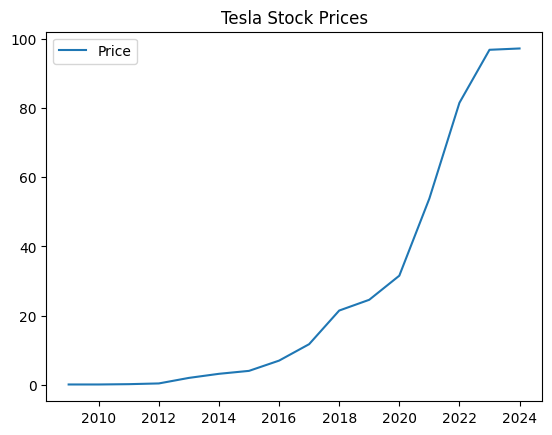

,year,price
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53
5,2019,24.57
6,2018,21.46
7,2017,11.75
8,2016,7.00
9,2015,4.04


In [85]:

df = pd.DataFrame()
df['year'] = years
df['price'] = prices

plt.plot(df['year'], df['price'])
plt.title("Tesla Stock Prices")

plt.legend(["Price"])
plt.show()
df

In [86]:
#Lol I really don't know any other ways to represent stock prices
df


,year,price
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53
5,2019,24.57
6,2018,21.46
7,2017,11.75
8,2016,7.00
9,2015,4.04


In [87]:
conn = sqlite3.connect("tesla_revenue.db")
cursor = conn.cursor()

In [88]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    year TEXT,
    price REAL
)
""")

In [89]:
for index, row in df.iterrows():
    cursor.execute("INSERT INTO revenue (year, price) VALUES (?, ?)", (row["year"], row["price"]))

conn.commit()
conn.close()